In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [6]:
# Loading a Dataset

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [7]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8                     0.340   27        0
765            5      121             72             23      112  26.2                     0.245   30        0
766            1      126             60              0        0  30.1                     0.349   47        1
767            1       93             70             31        0  30.4                     0.315   23        0

[768 rows x 9 columns]

In [10]:
# Genearating Profile Report of the dataset
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Updating zero values in a dataset

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [17]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

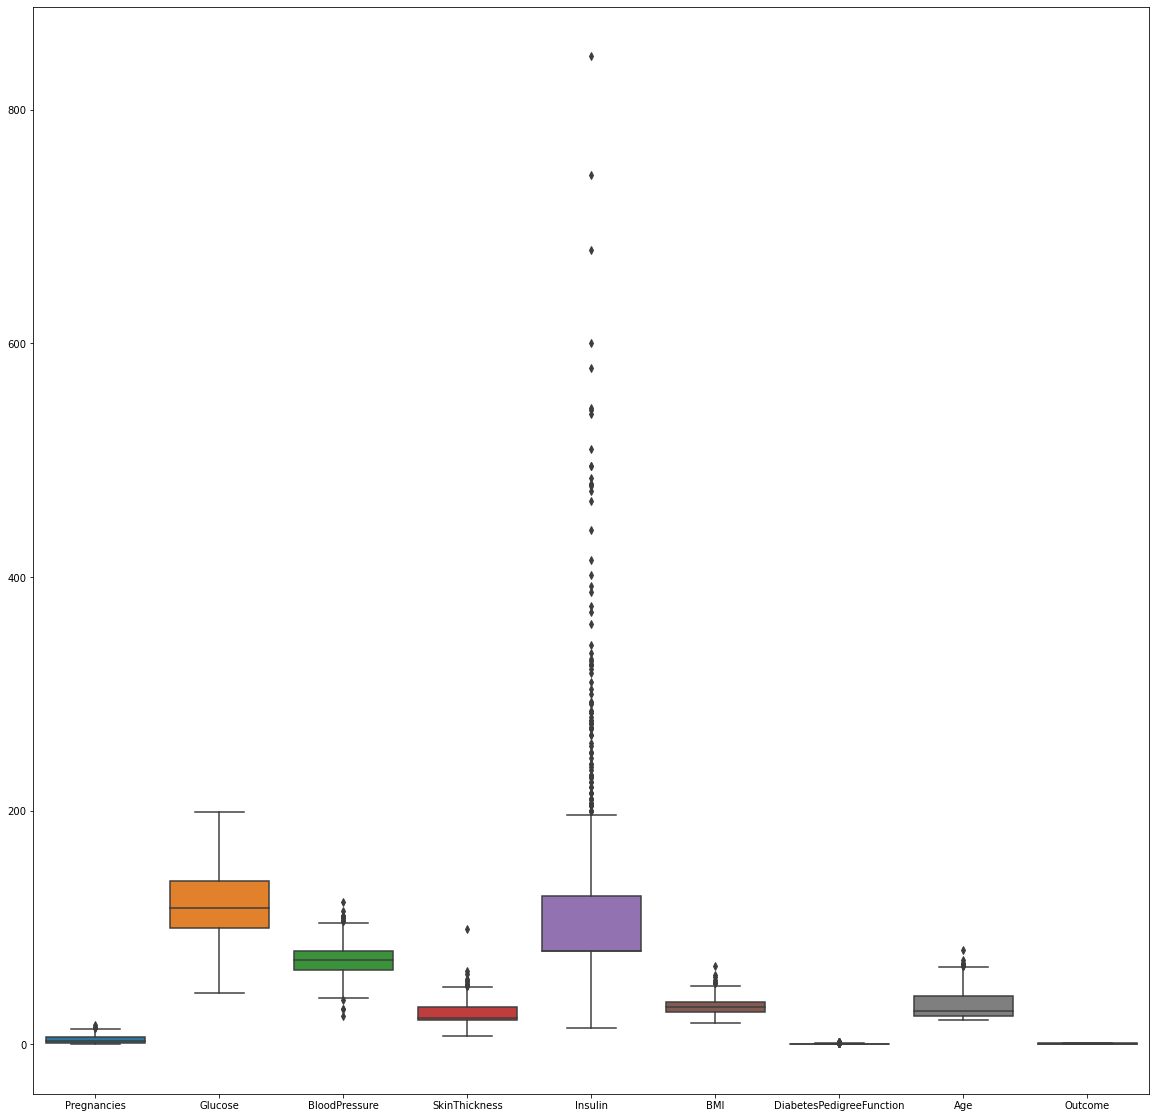

In [19]:
# Next step is to remove outliers

fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [26]:
q = df['Insulin'].quantile(0.70)
df_new = df[df['Insulin'] < q]

In [27]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6    148.0           72.0      35.000000  79.799479  33.6                     0.627   50        1
1              1     85.0           66.0      29.000000  79.799479  26.6                     0.351   31        0
2              8    183.0           64.0      20.536458  79.799479  23.3                     0.672   32        1
3              1     89.0           66.0      23.000000  94.000000  28.1                     0.167   21        0
5              5    116.0           74.0      20.536458  79.799479  25.6                     0.201   30        0
..           ...      ...            ...            ...        ...   ...                       ...  ...      ...
761            9    170.0           74.0      31.000000  79.799479  44.0                     0.403   43        1
762            9     89.0           62.0      20.536458  79.799479  22.5                     0.142   33        0
764            2    122.0           70.0      27.000000  79.799479  36.8                     0.340   27        0
766            1    126.0           60.0      20.536458  79.799479  30.1                     0.349   47        1
767            1     93.0           70.0      31.000000  79.799479  30.4                     0.315   23        0

[536 rows x 9 columns]

<AxesSubplot:>

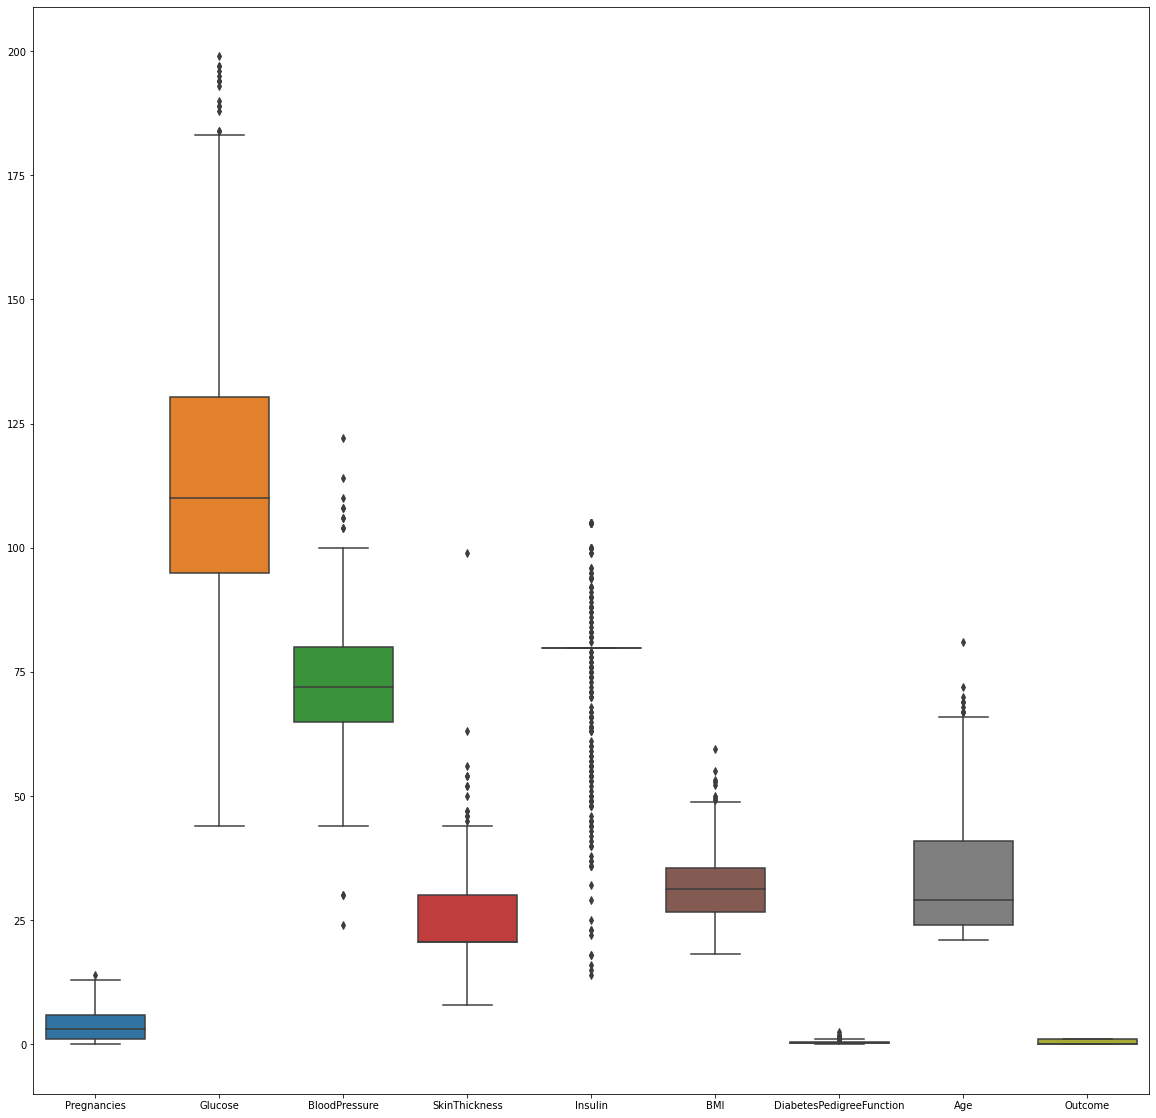

In [28]:

fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

In [48]:
q = df['Pregnancies'].quantile(0.98)
df_new = df[df['Pregnancies'] < q]

q = df_new['BMI'].quantile(0.99)
df_new = df_new[df_new['BMI'] < q]

q = df_new['SkinThickness'].quantile(0.99)
df_new = df_new[df_new['SkinThickness'] < q]

q = df_new['Insulin'].quantile(0.95)
df_new = df_new[df_new['Insulin'] < q]

q = df_new['DiabetesPedigreeFunction'].quantile(0.99)
df_new = df_new[df_new['DiabetesPedigreeFunction'] < q]

q = df_new['Age'].quantile(0.99)
df_new = df_new[df_new['Age'] < q]

In [49]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6    148.0           72.0      35.000000   79.799479  33.6                     0.627   50        1
1              1     85.0           66.0      29.000000   79.799479  26.6                     0.351   31        0
2              8    183.0           64.0      20.536458   79.799479  23.3                     0.672   32        1
3              1     89.0           66.0      23.000000   94.000000  28.1                     0.167   21        0
5              5    116.0           74.0      20.536458   79.799479  25.6                     0.201   30        0
..           ...      ...            ...            ...         ...   ...                       ...  ...      ...
763           10    101.0           76.0      48.000000  180.000000  32.9                     0.171   63        0
764            2    122.0           70.0      27.000000   79.799479  36.8                     0.340   27        0
765            5    121.0           72.0      23.000000  112.000000  26.2                     0.245   30        0
766            1    126.0           60.0      20.536458   79.799479  30.1                     0.349   47        1
767            1     93.0           70.0      31.000000   79.799479  30.4                     0.315   23        0

[674 rows x 9 columns]

<AxesSubplot:>

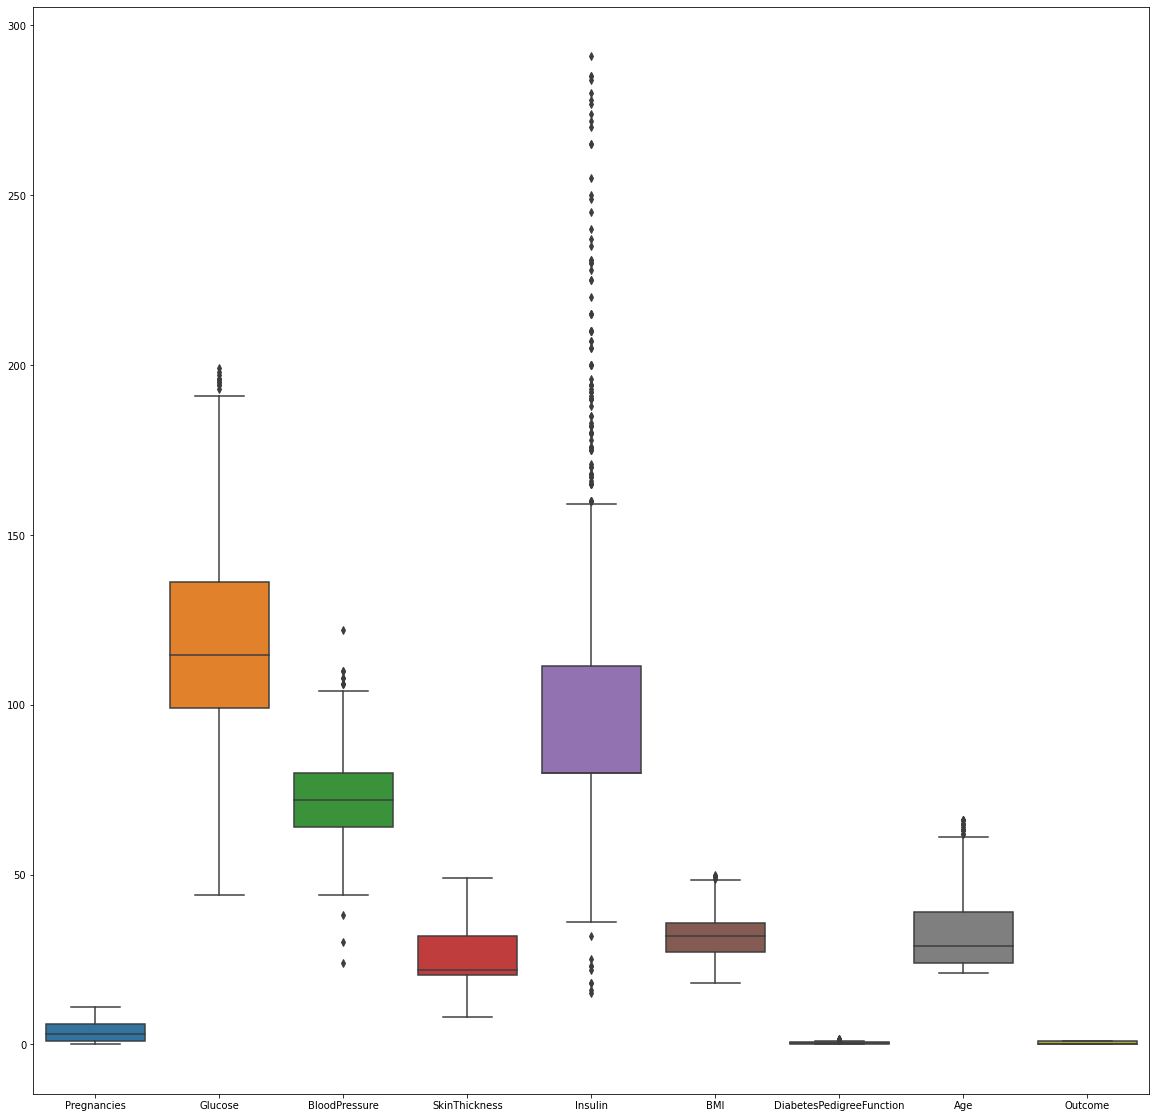

In [50]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

In [51]:
pf = ProfileReport(df_new)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6    148.0           72.0      35.000000   79.799479  33.6                     0.627   50        1
1              1     85.0           66.0      29.000000   79.799479  26.6                     0.351   31        0
2              8    183.0           64.0      20.536458   79.799479  23.3                     0.672   32        1
3              1     89.0           66.0      23.000000   94.000000  28.1                     0.167   21        0
5              5    116.0           74.0      20.536458   79.799479  25.6                     0.201   30        0
..           ...      ...            ...            ...         ...   ...                       ...  ...      ...
763           10    101.0           76.0      48.000000  180.000000  32.9                     0.171   63        0
764            2    122.0           70.0      27.000000   79.799479  36.8                     0.340   27        0
765            5    121.0           72.0      23.000000  112.000000  26.2                     0.245   30        0
766            1    126.0           60.0      20.536458   79.799479  30.1                     0.349   47        1
767            1     93.0           70.0      31.000000   79.799479  30.4                     0.315   23        0

[674 rows x 9 columns]

In [60]:
# Defining Features and Label

y = df_new['Outcome']
x = df_new.drop(columns = ['Outcome'])

In [61]:
 y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [62]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction  Age
0              6    148.0           72.0      35.000000   79.799479  33.6                     0.627   50
1              1     85.0           66.0      29.000000   79.799479  26.6                     0.351   31
2              8    183.0           64.0      20.536458   79.799479  23.3                     0.672   32
3              1     89.0           66.0      23.000000   94.000000  28.1                     0.167   21
5              5    116.0           74.0      20.536458   79.799479  25.6                     0.201   30
..           ...      ...            ...            ...         ...   ...                       ...  ...
763           10    101.0           76.0      48.000000  180.000000  32.9                     0.171   63
764            2    122.0           70.0      27.000000   79.799479  36.8                     0.340   27
765            5    121.0           72.0      23.000000  112.000000  26.2                     0.245   30
766            1    126.0           60.0      20.536458   79.799479  30.1                     0.349   47
767            1     93.0           70.0      31.000000   79.799479  30.4                     0.315   23

[674 rows x 8 columns]

In [72]:
# Normalizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_new_scaler = pd.DataFrame(x_scaled)
ProfileReport(df_new_scaler)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

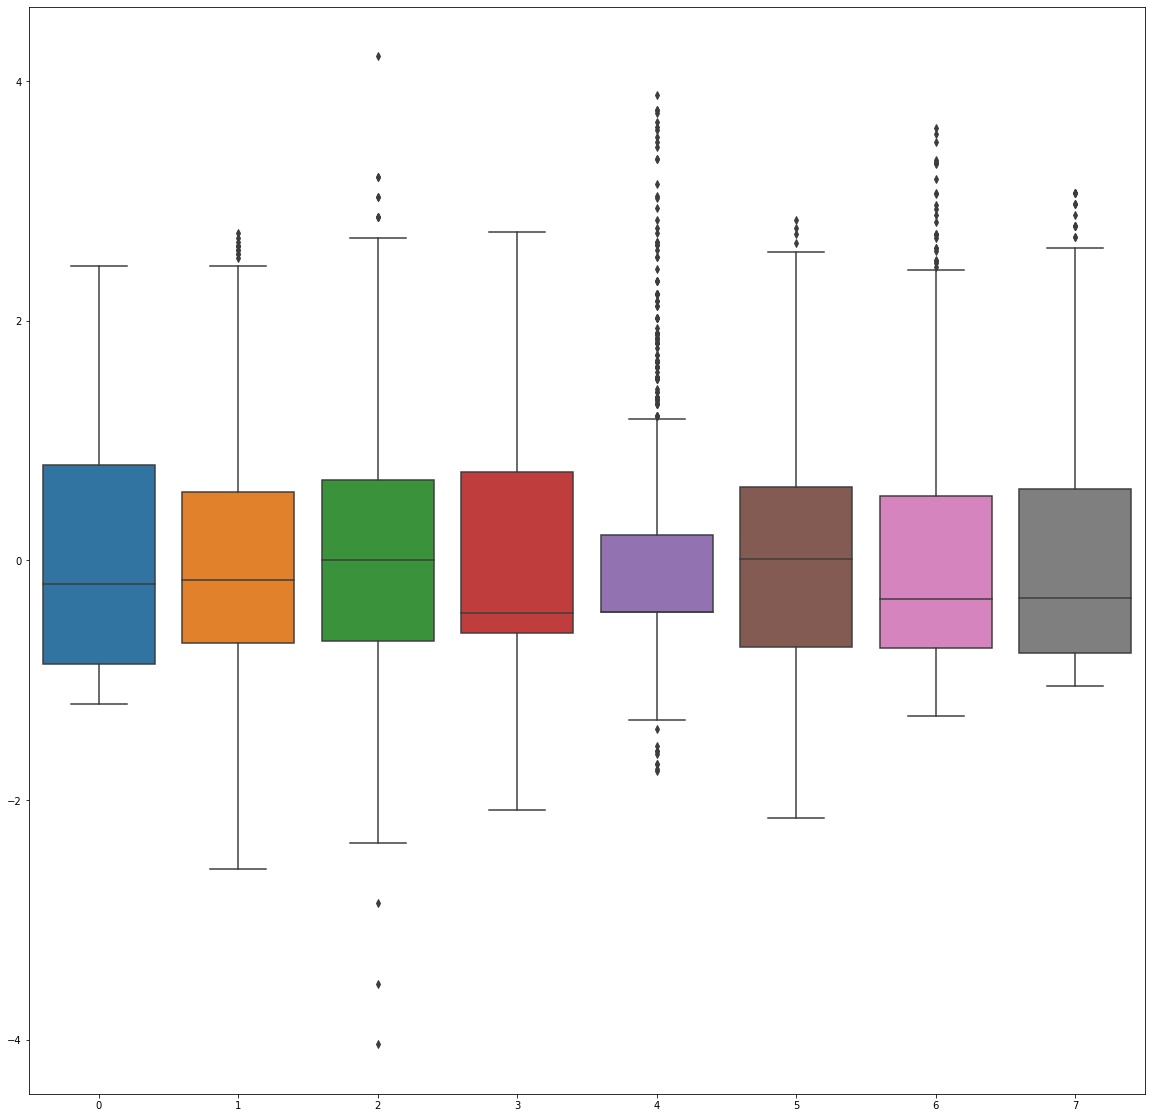

In [73]:
# Box Plotting of normalized data
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scaler, ax = ax)

In [74]:
x_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [75]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [76]:
# Check the multi-collinearity of the dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame() # Generating new dataframe

vif_df['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif_df['feature'] = x.columns

In [81]:
vif_df # There is no multi-collinearity

vif                   feature
0  1.449056               Pregnancies
1  1.304263                   Glucose
2  1.262686             BloodPressure
3  1.470049             SkinThickness
4  1.271017                   Insulin
5  1.513160                       BMI
6  1.042300  DiabetesPedigreeFunction
7  1.662728                       Age

In [88]:
# Dividing the data for tarining and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 144)

In [89]:
x_train

array([[-0.86479354,  0.19769063, -1.85094678, ...,  0.21879402,
         1.80609569, -0.40651517],
       [ 2.45830136,  1.22329076,  0.33707068, ...,  0.21879402,
         3.1782269 ,  1.69268475],
       [ 0.13213493,  0.91561072,  1.09446134, ..., -0.47091521,
        -0.90658316, -0.49778473],
       ...,
       [-0.86479354, -0.28092276,  1.17861586, ..., -0.28281269,
        -1.06801036, -0.86286298],
       [ 1.46137289,  0.02675728,  0.50537972, ..., -1.08224839,
        -0.13454002,  2.87918905],
       [-0.86479354, -0.75953616, -0.33616546, ..., -0.73739378,
         2.27283086, -0.95413254]])

In [90]:
x_test

array([[ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, ...,
        -4.70915211e-01, -2.50346495e-01,  1.23633694e+00],
       [-1.19710303e+00,  6.76304024e-01, -8.41092564e-01, ...,
        -1.53682948e+00, -8.43415997e-01, -1.04540210e+00],
       [ 2.45830136e+00,  8.13050708e-01,  1.85185200e+00, ...,
         7.36075942e-01, -6.78479508e-01,  1.69268475e+00],
       ...,
       [ 7.96753910e-01, -5.54416131e-01, -5.04474494e-01, ...,
        -1.19197486e+00, -6.96025943e-01, -3.15245608e-01],
       [-5.32484049e-01, -1.20396288e+00, -2.43135269e-01, ...,
         1.38528976e-02, -5.03015158e-01, -1.04540210e+00],
       [-8.64793539e-01, -1.64838960e+00, -2.01925581e+00, ...,
        -1.80330804e+00, -4.36338705e-01, -9.54132539e-01]])

In [91]:
y_train

356    1
259    1
69     0
407    0
657    0
      ..
734    0
485    1
249    0
509    0
416    0
Name: Outcome, Length: 539, dtype: int64

In [92]:
y_test

406    1
511    0
24     1
751    0
689    1
      ..
3      0
469    0
587    0
60     0
97     0
Name: Outcome, Length: 135, dtype: int64

In [95]:
# Buliding a model
logr = LogisticRegression()

In [96]:
logr.fit(x_train, y_train)

LogisticRegression()

In [97]:
# Lets predict something
logr.predict([x_test[0]])  # Predicted y

array([0], dtype=int64)

In [98]:
logr.predict_proba([x_test[0]])

array([[0.83549024, 0.16450976]])

In [100]:
logr.predict_log_proba([x_test[0]])

array([[-0.17973662, -1.80478536]])

In [101]:
 y_test.iloc[0] # actual y

1

In [102]:
logr.predict([x_test[1]]) # Predicted y

array([0], dtype=int64)

In [104]:
 y_test.iloc[1]  # Actual y

0

In [105]:
logr.predict_proba([x_test[1]])

array([[0.91629065, 0.08370935]])

In [106]:
logr.predict_log_proba([x_test[1]])

array([[-0.08742167, -2.48040456]])

In [107]:
logr_liblin = LogisticRegression(solver = 'liblinear')

In [108]:
logr_liblin.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [110]:
# Let predict with this new model
print(logr_liblin.predict([x_test[0]]))
print(logr_liblin.predict_proba([x_test[0]]))
print(logr_liblin.predict_log_proba([x_test[0]]))

[0]
[[0.83302391 0.16697609]]
[[-0.18269294 -1.78990462]]


In [111]:
logr

LogisticRegression()

In [112]:
logr_liblin

LogisticRegression(solver='liblinear')

In [114]:
y_perd_liblin = logr_liblin.predict(x_test)
y_perd_liblin

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [116]:
y_pred = logr.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [118]:
confusion_matrix(y_test, y_perd_liblin)

array([[77, 10],
       [24, 24]], dtype=int64)

In [121]:
confusion_matrix(y_test, y_pred)

array([[77, 10],
       [24, 24]], dtype=int64)

In [139]:
def mod_eva(y_actual,y_pred):
    tp, fp, fn, tn = confusion_matrix(y_actual, y_pred).ravel()
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(fp+tn)
    f1_score = 2*(recall*precision)/(recall + precision)
    result = print('\n','Accuracy: ', accuracy,'\n','Recall: ', recall,'\n', 'Precision: ', precision,'\n', 'Specificity: ', specificity,'\n', 'F1 Score: ', f1_score)
    return result


In [140]:
mod_eva(y_test, y_pred)


 Accuracy:  0.7481481481481481 
 Recall:  0.7623762376237624 
 Precision:  0.8850574712643678 
 Specificity:  0.7058823529411765 
 F1 Score:  0.8191489361702128


In [141]:
mod_eva(y_test, y_perd_liblin)


 Accuracy:  0.7481481481481481 
 Recall:  0.7623762376237624 
 Precision:  0.8850574712643678 
 Specificity:  0.7058823529411765 
 F1 Score:  0.8191489361702128


In [148]:
auc = roc_auc_score(y_test, y_pred)
auc

0.692528735632184

In [149]:
roc_auc_score(y_test, y_perd_liblin)

0.692528735632184

In [150]:
roc_curve(y_test, y_pred)

(array([0.        , 0.11494253, 1.        ]),
 array([0. , 0.5, 1. ]),
 array([2, 1, 0], dtype=int64))

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

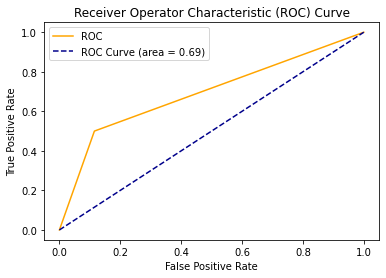

In [152]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'ROC Curve (area = %0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.legend()
plt.show()
